In [2]:
# load necessary packages
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as pt
from matplotlib import cm

Using TensorFlow backend.
D:\Anocondo\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anocondo\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anocondo\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anocondo\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [3]:
# load the data
with np.load('training-dataset.npz') as data:
    img = data['x']
    lbl = data['y']

In [277]:
# split datasets
X_train, X_val, Y_train, Y_val= train_test_split(img, lbl, test_size=0.2)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(99840, 784)
(24960, 784)
(99840,)
(24960,)


In [17]:
#1 sklearn KNN trial
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=500)
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=500, p=2,
                     weights='uniform')

In [18]:
#1 sklearn KNN trial accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_val, clf.predict(X_val)))

0.6942708333333333


In [19]:
#2 sklearn perceptron base
from sklearn.linear_model import Perceptron
baseline = Perceptron()
baseline.fit(X_train, Y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
#2 sklearn perceptron baseline accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_val, baseline.predict(X_val)))

0.5059294871794872


In [11]:
# reshape and check the shape of input variables
d = img[1]
print(d.shape)
d = d.reshape(28,28)
print(d.shape)

(784,)
(28, 28)


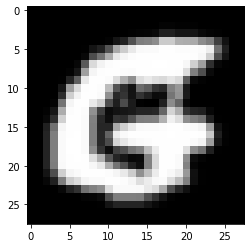

In [22]:
# visualize the input variables
pt.imshow(d, cmap = "gray")
pt.show()


In [23]:
#3 sklearn MLPClassifier
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier( hidden_layer_sizes= (100, 100, 100,), random_state = 1, max_iter = 300, activation = 'relu', solver = 'sgd', alpha = 1e-4, learning_rate_init =.1, verbose = True).fit(X_train, Y_train)



Iteration 1, loss = inf
Iteration 2, loss = 122042191276514145378771792113613106829993532076552482950937809527984279736729922262452292785354670426030080.00000000
Iteration 3, loss = 121980697242896724408903350276954855348480801789837758461184564780993676641885306533755512913662254851817472.00000000
Iteration 4, loss = 121919234194597948370324250528724687978951390601778878768213497222164334030603521755103905778696889294651392.00000000
Iteration 5, loss = 121857802116005012059426161626328518259070895059585373809887061104710571240740494377137770569343697701306368.00000000
Iteration 6, loss = 121796400991512736935296148643079248787162316422301750221733595947169089319994533654083720407115754658332672.00000000
Iteration 7, loss = 121735030805524239267516910679633067272391858936844316218580448960489179679973719880821004720593713546395648.00000000
Iteration 8, loss = 121673691542450864951015538160434685944506900737900027947565377738072703739701525052679916818651208671559680.00000000
Iteration 

Iteration 61, loss = 118466555179390588536963202806779091843281999641610159947582394474475896291307663132969757095359259384741888.00000000
Iteration 62, loss = 118406862820129176919160373819661161346806849982575793319259280581531526380200195064183075652356624820994048.00000000
Iteration 63, loss = 118347200538367068127348821172834614802856776302483021571738192226997972714730051036812220478506715878260736.00000000
Iteration 64, loss = 118287568318949284867673342040566371454458759708994014267294790168292528471026453407381900214082787430367232.00000000
Iteration 65, loss = 118227966146728232064656969774699987391814576896226591489663380515804792198207084810247165831581302983229440.00000000
Iteration 66, loss = 118168394006563191676278842952106260977770074618970283079875285580706510055546648271031069328218801192304640.00000000
Iteration 67, loss = 118108851883322245655935865129548670260545028145670361222422464518772176329061057742571640315782532989714432.00000000
Iteration 68, loss = 118049

Iteration 120, loss = 114995679357096798067197718998228952855731250527196267769696115824834046038678544652852852848767079500742656.00000000
Iteration 121, loss = 114937735886086671620134493188303494773461633511663546947375925086726194264230475895968883509230521085329408.00000000
Iteration 122, loss = 114879821611354720191988479158598731592874883730193441964112561633944998820534579469846807504961312653312000.00000000
Iteration 123, loss = 114821936518189763294852610560080371208457603054127439492299321759216344986578220658502973064388648764440576.00000000
Iteration 124, loss = 114764080591887399696549062213409222901947419765327005491143621991108235116764216126919340800499902324932608.00000000
Iteration 125, loss = 114706253817751669641985939049587592394014730608753003204876230498011307731517507096184090593592870239731712.00000000
Iteration 126, loss = 114648456181093229668922480410425985316925885989633391047070542409258267535442537817847033641587033088458752.00000000
Iteration 127, loss 

Iteration 179, loss = 111626494505352032150961992696365700599305247556460119145654923535285670607079646839369110876108166606618624.00000000
Iteration 180, loss = 111570248683035252503908442871712056257673993715639663102003649977931530068552697556615916990719916783960064.00000000
Iteration 181, loss = 111514031201593402921395637201235402848749075427927806629400561318082482674718042538683156121691503665872896.00000000
Iteration 182, loss = 111457842046746111580079537129314189308767417133190489347878575374238949775916106461911525050769436156362752.00000000
Iteration 183, loss = 111401681204220731097038364471565994520016391633280358045619391195163764967071265816530423132490070602285056.00000000
Iteration 184, loss = 111345548659751165197050232750861836686117296290216001033158737480601807670793020783029288612236849156456448.00000000
Iteration 185, loss = 111289444399078716119559302343538061005431731327496945554238137610760267771802926654778300174310072070963200.00000000
Iteration 186, loss 

Iteration 238, loss = 108356021245461688370485416422741282229834942426850465857617580933765515023457515954797818562028674754805760.00000000
Iteration 239, loss = 108301423333515079150269661258246395188775465692609900703723542419178817741530879166098474184709618437980160.00000000
Iteration 240, loss = 108246852932101955323651661024243693744035937821167730205865404053262132168755965222720016961260068668440576.00000000
Iteration 241, loss = 108192310027360922626899854263335320741045324152554960003285293422546721023096407946738466767154335522488320.00000000
Iteration 242, loss = 108137794605437023829967896494156027313607963661791518375349322472115857226335801005137095621858268612132864.00000000
Iteration 243, loss = 108083306652482341699143655219254708343827338134821927476192112622735012201650706806671157636494287370715136.00000000
Iteration 244, loss = 108028846154655787145307671138541430543754477593186553982003853513481789715003923646212713626823937979580416.00000000
Iteration 245, loss 

Iteration 297, loss = 105181367489628921540081757793167694254402789627793158829563542478576426808308570195671103397448654004420608.00000000
Iteration 298, loss = 105128369206980534236666034338816042331303359554461407964626829128541944944731464269607310085689257637183488.00000000
Iteration 299, loss = 105075397628852133506648198374135944130804027705473900396081573287419701691562204426279231893303414776397824.00000000
Iteration 300, loss = 105022452741788314504524056856667188797816502125871843619901098300237745102882550098330920754654611328991232.00000000


D:\Anocondo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
#3 sklearn MLPClassifier accuracy
y_pred = clf.predict(X_val)
print(accuracy_score(Y_val, y_pred))

0.03862179487179487


In [280]:
##4 keras CNN trial (Optimal)

# use keras utils to binarize target variabels
y_train = keras.utils.to_categorical(Y_train,27)
y_val = keras.utils.to_categorical(Y_val,27)



In [281]:
# reshape input variables
X_train_shaped = []
for i in X_train:
    i = i.reshape(28, 28,1)
    X_train_shaped.append(i)
X_train_shaped = np.array(X_train_shaped)

X_val_shaped = []
for i in X_val:
    i = i.reshape(28, 28,1)
    X_val_shaped.append(i)
X_val_shaped = np.array(X_val_shaped)


In [282]:
# check the shapes of input variables
print(X_train_shaped.shape)
print(X_val_shaped.shape)

(99840, 28, 28, 1)
(24960, 28, 28, 1)


In [283]:

# build the model
model = Sequential()
model.add(Conv2D(128, kernel_size=5, activation='relu', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=5, activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(27, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[keras.metrics.CategoricalAccuracy()])
model.fit(X_train_shaped, y_train,  epochs=3)


Epoch 1/3
99840/99840 [==============================] - 684s 7ms/step - loss: 0.5963 - categorical_accuracy: 0.8290
Epoch 2/3
99840/99840 [==============================] - 534s 5ms/step - loss: 0.3641 - categorical_accuracy: 0.8863
Epoch 3/3
99840/99840 [==============================] - 482s 5ms/step - loss: 0.3217 - categorical_accuracy: 0.8974


In [8]:
# check the performance in validation set
scores = model.evaluate(X_val_shaped, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print(scores)

24960/24960 [==============================] - 21s 861us/step
Test loss: 0.32664645696297673
Test accuracy: 0.899919867515564
[0.32664645696297673, 0.899919867515564]


In [52]:
# creating confusion matrix
y_pred = model.predict(X_val_shaped)
matrix = sklearn.metrics.confusion_matrix(y_val.argmax(axis=1), y_pred.argmax(axis=1))


In [58]:
print(matrix)


[[884   3   1  16  10   0  10   9   0   0   0   0   1   6   5   1  26   4
    0   0   4   0   1   0   0   2]
 [ 10 892   1   7   1   0   5  17   1   1   4   3   0   0   8   1   2   2
    0   0   0   0   0   0   0   2]
 [  2   1 851   0  28   0   5   0   0   0   0   4   0   1   3   0   2   6
    1   0   0   0   0   1   0   2]
 [ 15   3   2 863   1   0   0   2   1   4   0   2   0   0  29   3   2   1
    0   0   0   1   0   0   0   0]
 [ 10   3  28   0 879   2   3   1   1   2   0   1   0   0   0   0   0   6
    0   0   1   0   1   1   1   4]
 [  2   0   3   2   4 849   5   0   2   1   0   1   0   0   0   8   1   5
    1  26   0   0   0   0   0   1]
 [ 24  21   6   3   2   4 751   1   1   3   2   3   1   1   1   1 113   1
   10   1   0   0   0   0   4   3]
 [ 13   7   0   3   0   1   1 876   1   0  10   9   5  20   0   0   2   2
    0   2   1   0   0   4   0   0]
 [  0   0   0   0   1   1   0   0 773  10   0 131   0   0   0   0   3   4
    0   4   0   0   0   1   0  11]
 [  6   5   0  21  

In [287]:
# try a smaller model to make it faster in testing task. The difference in accuracy is very small. 
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(27, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_shaped, y_train,  epochs=3)

Epoch 1/3
99840/99840 [==============================] - 178s 2ms/step - loss: 0.6255 - accuracy: 0.8291
Epoch 2/3
99840/99840 [==============================] - 182s 2ms/step - loss: 0.3231 - accuracy: 0.8975
Epoch 3/3
99840/99840 [==============================] - 173s 2ms/step - loss: 0.2344 - accuracy: 0.9211


In [45]:
# check the performance in validation set
scores = model.evaluate(X_val_shaped, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

24960/24960 [==============================] - 6s 235us/step
Test loss: 0.3934878533395628
Test accuracy: 0.8832532167434692


In [4]:
with np.load('training-dataset.npz') as data:
    img = data['x']
    lbl = data['y']

In [5]:
img1 = img
img2 = img
img3 = img
type(img)

numpy.ndarray

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
img3 = scaler.fit_transform(img3)

In [8]:
from skimage.util import random_noise
img2 = np.array(img2)
#add noise to the entire image dataset
for i in range(len(img3)):
    img3[i,:] = random_noise(img3[i,:], mode='s&p',amount=0.05)

In [9]:
img3 = scaler.inverse_transform(img3)

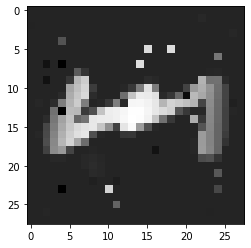

In [10]:
d =img3[6]
d = d.reshape(28,28)
pt.imshow(d, cmap = "gray")
pt.show()

In [11]:
# split datasets
X_train, X_val, Y_train, Y_val= train_test_split(img3, lbl, test_size=0.2)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(99840, 784)
(24960, 784)
(99840,)
(24960,)


In [12]:
import matplotlib.pyplot as pt
from scipy import misc
d = img[2]
print(d.shape)
d = d.reshape(28,28)
print(d.shape)

(784,)
(28, 28)


In [13]:
##4 keras CNN trial (Optimal)

# one_hot 
y_train = keras.utils.to_categorical(Y_train,27)
y_val = keras.utils.to_categorical(Y_val,27)



In [14]:
X_train_shaped = []
for i in X_train:
    i = i.reshape(28, 28,1)
    X_train_shaped.append(i)
X_train_shaped = np.array(X_train_shaped)

X_val_shaped = []
for i in X_val:
    i = i.reshape(28, 28,1)
    X_val_shaped.append(i)
X_val_shaped = np.array(X_val_shaped)

In [15]:
print(X_train_shaped.shape)
print(X_val_shaped.shape)

(99840, 28, 28, 1)
(24960, 28, 28, 1)


In [19]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(27, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_shaped, y_train,  epochs=3)


Epoch 1/3
99840/99840 [==============================] - 177s 2ms/step - loss: 0.8008 - accuracy: 0.7744
Epoch 2/3
99840/99840 [==============================] - 180s 2ms/step - loss: 0.4379 - accuracy: 0.8634
Epoch 3/3
99840/99840 [==============================] - 177s 2ms/step - loss: 0.3440 - accuracy: 0.8902


In [20]:
scores = model.evaluate(X_val_shaped, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

24960/24960 [==============================] - 6s 246us/step
Test loss: 0.4744233191968539
Test accuracy: 0.8551282286643982


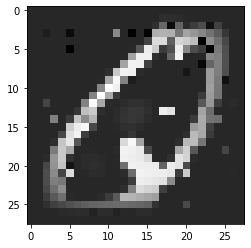

In [21]:
test = X_val_shaped[1:2]
test = test.reshape(28, 28)
pt.imshow(test, cmap = "gray")
pt.show()

In [22]:
# check the performance in validation set
scores = model.evaluate(X_val_shaped, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print(scores)

24960/24960 [==============================] - 6s 246us/step
Test loss: 0.4744233191968539
Test accuracy: 0.8551282286643982
[0.4744233191968539, 0.8551282286643982]


In [23]:
y_pred = model.predict(X_val_shaped)


In [24]:
matrix = sklearn.metrics.confusion_matrix(y_val.argmax(axis=1), y_pred.argmax(axis=1))

In [25]:
y_pred

array([[2.7951265e-11, 3.4154598e-07, 4.1213008e-07, ..., 6.3371161e-05,
        7.6759339e-04, 1.6662248e-11],
       [1.0382462e-07, 6.4845737e-03, 8.8985216e-06, ..., 3.8728590e-10,
        2.3617950e-09, 2.6382891e-08],
       [3.1541911e-10, 3.0956820e-05, 1.5725789e-06, ..., 5.7560906e-06,
        2.8682618e-06, 2.5887357e-05],
       ...,
       [2.5664079e-08, 3.4028240e-02, 3.1183688e-05, ..., 1.1990814e-07,
        2.5567379e-05, 3.2337351e-08],
       [9.2693474e-13, 1.8899220e-09, 4.8521129e-09, ..., 8.4723895e-12,
        2.2841871e-08, 4.2444381e-10],
       [4.1103568e-11, 8.9812456e-05, 1.3627206e-07, ..., 2.7151287e-10,
        5.1490051e-08, 2.3361182e-10]], dtype=float32)

In [26]:
matrix

array([[789,   3,   8,  15,   5,   6,  13,  13,   1,   0,   2,   0,   4,
         31,  11,   2,  36,   5,   0,   2,   5,   0,   1,   2,   0,   1],
       [ 10, 897,   1,  18,   0,   0,  20,  12,   5,   1,   3,   4,   0,
          3,   5,   1,   5,   0,   0,   0,   0,   0,   1,   2,   0,   3],
       [  4,   2, 860,   3,  14,   1,  11,   1,   2,   0,   1,   3,   0,
          1,   6,   0,   0,   8,   0,   0,   2,   0,   0,   0,   1,   0],
       [ 11,   8,   2, 778,   2,   0,   3,   3,   0,  17,   3,   6,   0,
          6,  36,   6,   4,   1,   0,   1,   4,   6,   1,   2,   1,   0],
       [  8,   5,  86,   2, 798,  11,   7,   0,   3,   4,   2,   2,   0,
          1,   2,   0,   4,  14,   2,   2,   1,   1,   0,   1,   0,   1],
       [  0,   1,   2,   1,   3, 879,  16,   0,   8,   3,   3,   1,   0,
          0,   0,  15,   5,  16,   3,  20,   0,   0,   2,   1,   1,   1],
       [ 18,  24,  22,   4,   5,  10, 693,   0,   3,  10,   4,   1,   1,
          0,   2,   1, 110,   2,  21,   0,   

In [27]:
# loading data
testdata = np.load('test-dataset.npy')
print(testdata[1].shape)

(30, 168)


In [28]:
def sliding_window(image):
    blank = []
    for i in range(0, 140, 10):
        crops = image[0:28, i:i+28]
        blank.append(crops)
    return blank

In [29]:
def encode(fin_result):
    result_list = []
    for i in fin_result:
        for j in range(14):
            encoded = np.where(np.round(i)[j] == 1.0)
            result_list.append(encoded)
    return result_list

In [31]:
def best_five(result):
    max1 = []
    max_index = []
    fin_result = []
    for i in result:
        max1.append(np.max(i))
    max1 = enumerate(max)
    max1 = sorted(max, key=lambda x: x[1])
    max1 = max1[-6:-1]
    max1 = sorted(max, key=lambda x: x[0])
    for i in max1:
        max_index.append(i[0])
    for i in max_index:
        fin_result.append(result[i])
    fin_result = np.round(fin_result)
    return fin_result

In [ ]:
## combine everthing here
# crop the pics
testdata_cropped = []
testdata_cropped_shaped = []
for i in testdata:
    testdata_cropped.append(sliding_window(i))
testdata_cropped = np.array(testdata_cropped)
for i in testdata_cropped:
    i = i.reshape(14,28,28,1)
    testdata_cropped_shaped.append(i)

In [ ]:
# prediction
itr = 0
result_list = []
while itr <= 4:
    itr += 1
    result = []
    best_result = []
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(27, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train_shaped, y_train,  epochs=1)
    for i in testdata_cropped_shaped:
        i = i.reshape(14,28,28,1)
        result.append(model.predict(i))
    for i in result:
        best_result.append(best_five(i))
    result_list.append(best_result)
    
    

In [ ]:
# making 5 predictions
result = list(zip(result_list[0], result_list[1], result_list[2], result_list[3], result_list[4]))
print(result)

In [ ]:
# a small accuracy score evaluation. 
correct = 0
for i in range(0, len(result)-1):
    for j in result[i]:
        if any(np.round(j)== y_val[i]):
            correct += 1
print(correct/len(result))